# TP Cuda
## Part 1 : Pi
### Compilation

In [1]:
import os
os.makedirs('dist/part1', exist_ok=True)


!nvcc -o dist/part1/part_1_pi_Atomic src/part1/part_1pi_Atomic.cu
!nvcc -o dist/part1/part_1_pi_nonAtomic_multiThreads src/part1/part_1pi_nonAtomic_multiThreads.cu
!nvcc -o dist/part1/part_1_pi_Reduction src/part1/part_1pi_Reduction.cu

### Performance evaluation

In [6]:
import os
import subprocess
import csv
import time

try:
    os.remove("saved_metrics/part1.csv")
except OSError:
    pass
os.makedirs('saved_metrics',exist_ok=True)

num_steps = [1000, 100000, 10000000]
thread_per_block = [1, 32, 64, 128, 256]
step_per_thread = [1, 64, 256, 1024]
repeats = range(0,10)
dist_dir = "dist/part1"
csv_fields = ["version", "thread_per_block", "step_per_thread", "num_steps", "runtime"]
with open('./saved_metrics/part1.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(csv_fields)


    for nsteps in num_steps:
        for tblock in thread_per_block:
            for repeat in repeats:
                for sthread in step_per_thread:
                    for file in os.listdir(dist_dir):
                        if file.startswith('.'):
                            continue
                        filename = os.path.join(os.getcwd(), dist_dir ,os.fsdecode(file))
                        version = os.fsdecode(file).split('_')[-1]
                        args = (filename, "-S", str(sthread), "-N", str(nsteps), "-T", str(tblock))
                        start = time.time()
                        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                        popen.wait()
                        end = time.time()
                        version = os.fsdecode(file).split('_')[-1]
                        writer.writerow([version, tblock, sthread, nsteps, end-start])
                        

csvFile.close()

### Performance analysis
#### Weak scaling

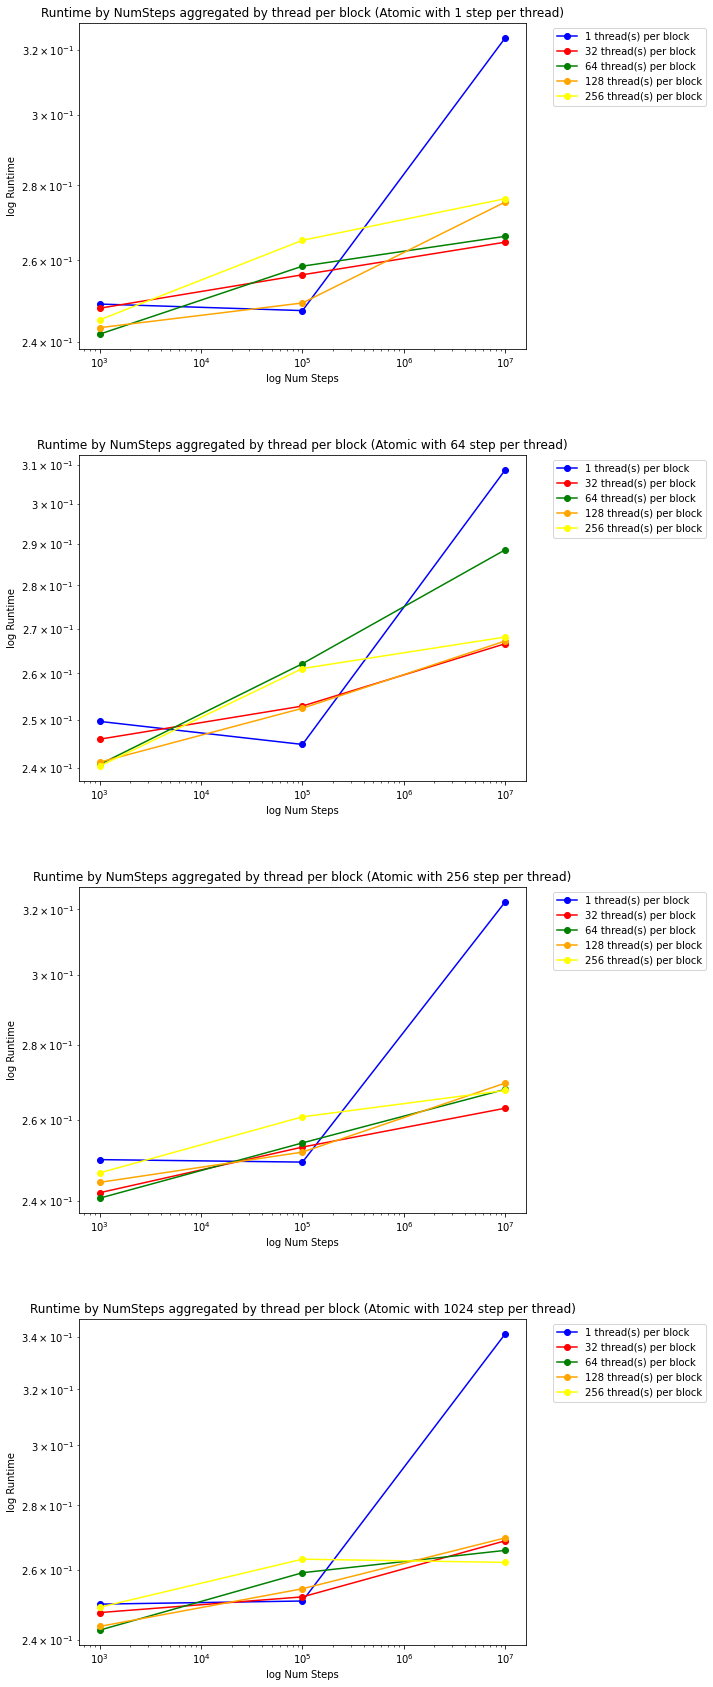

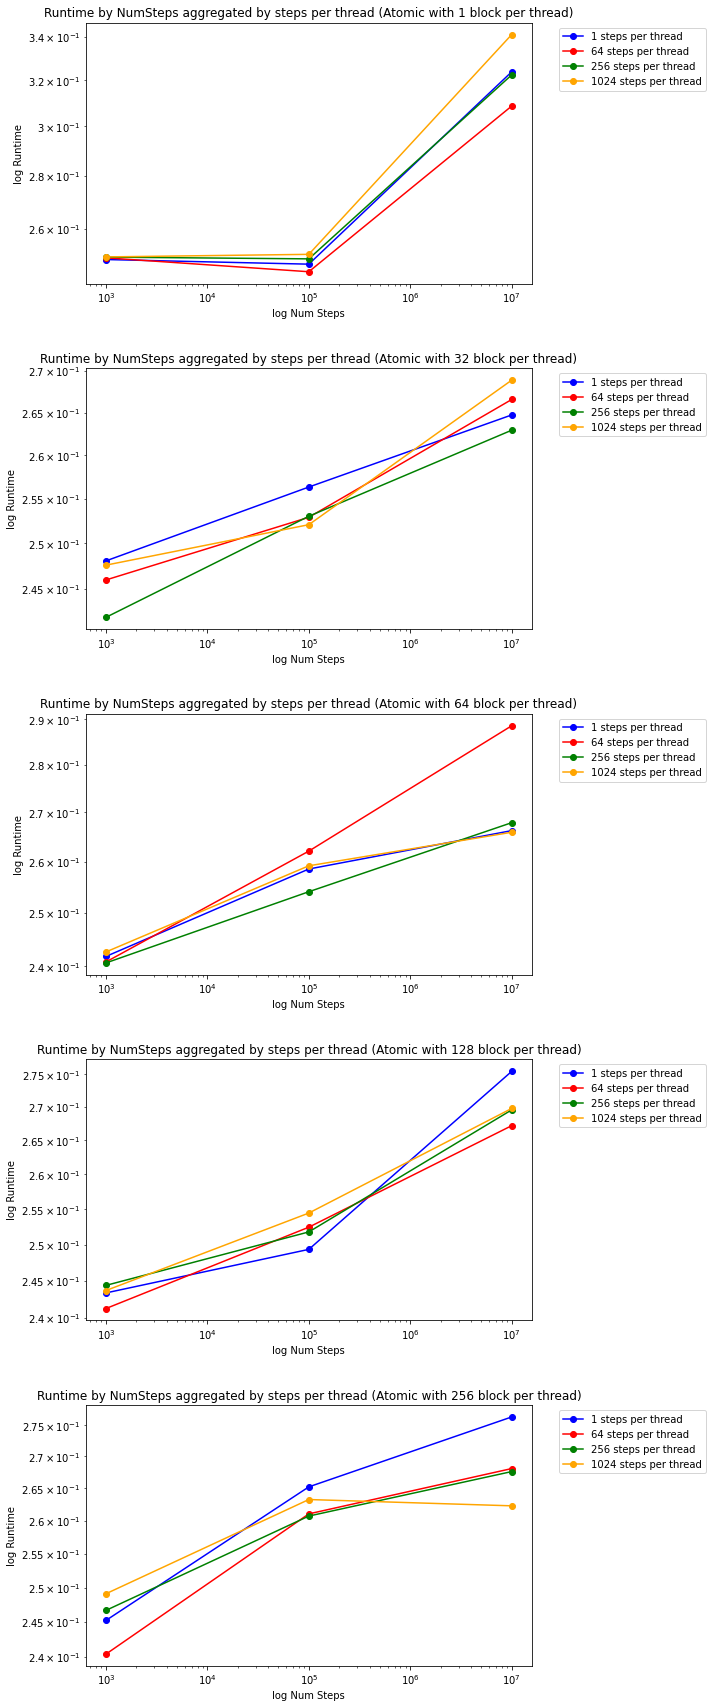

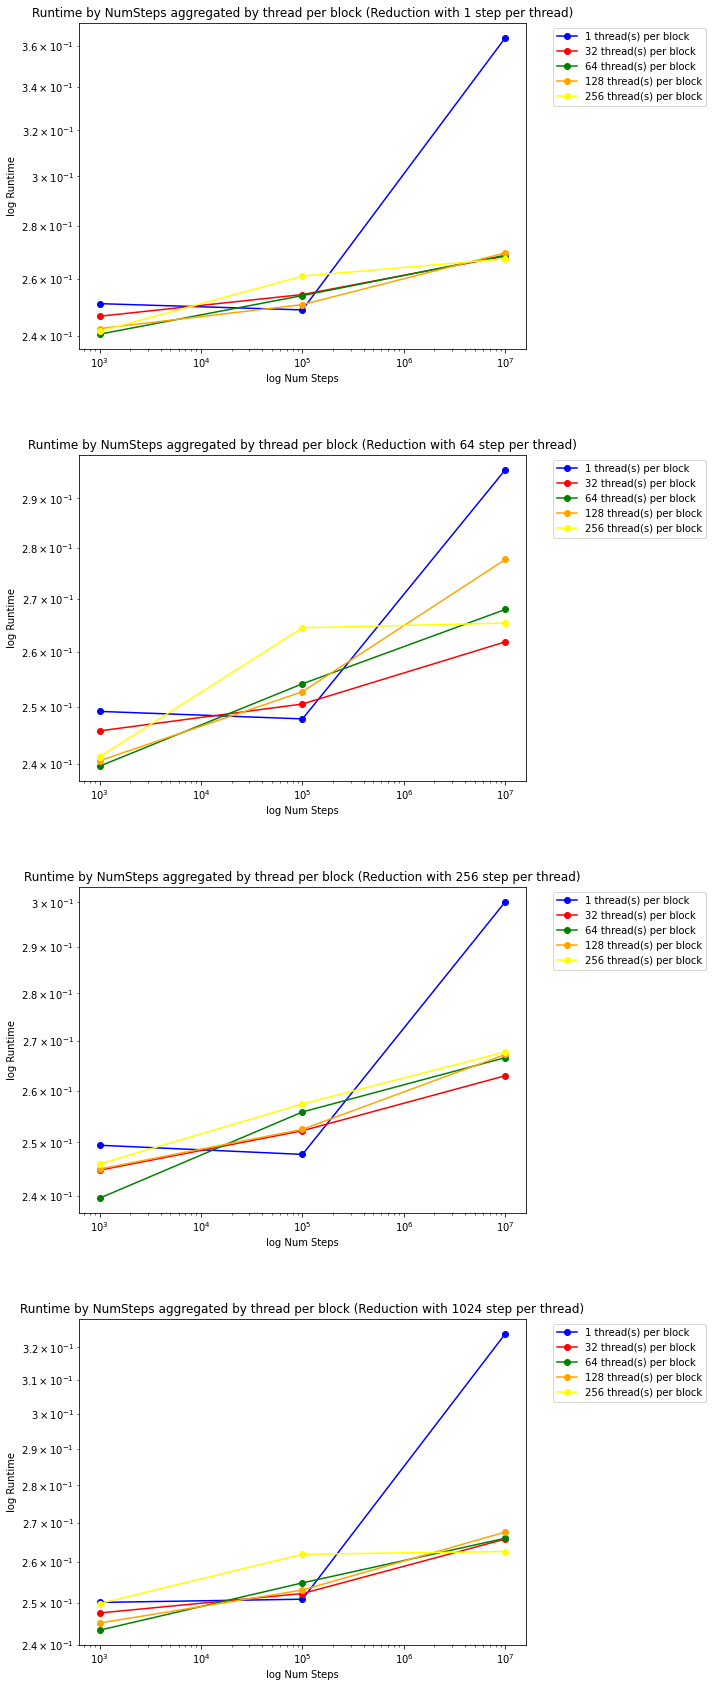

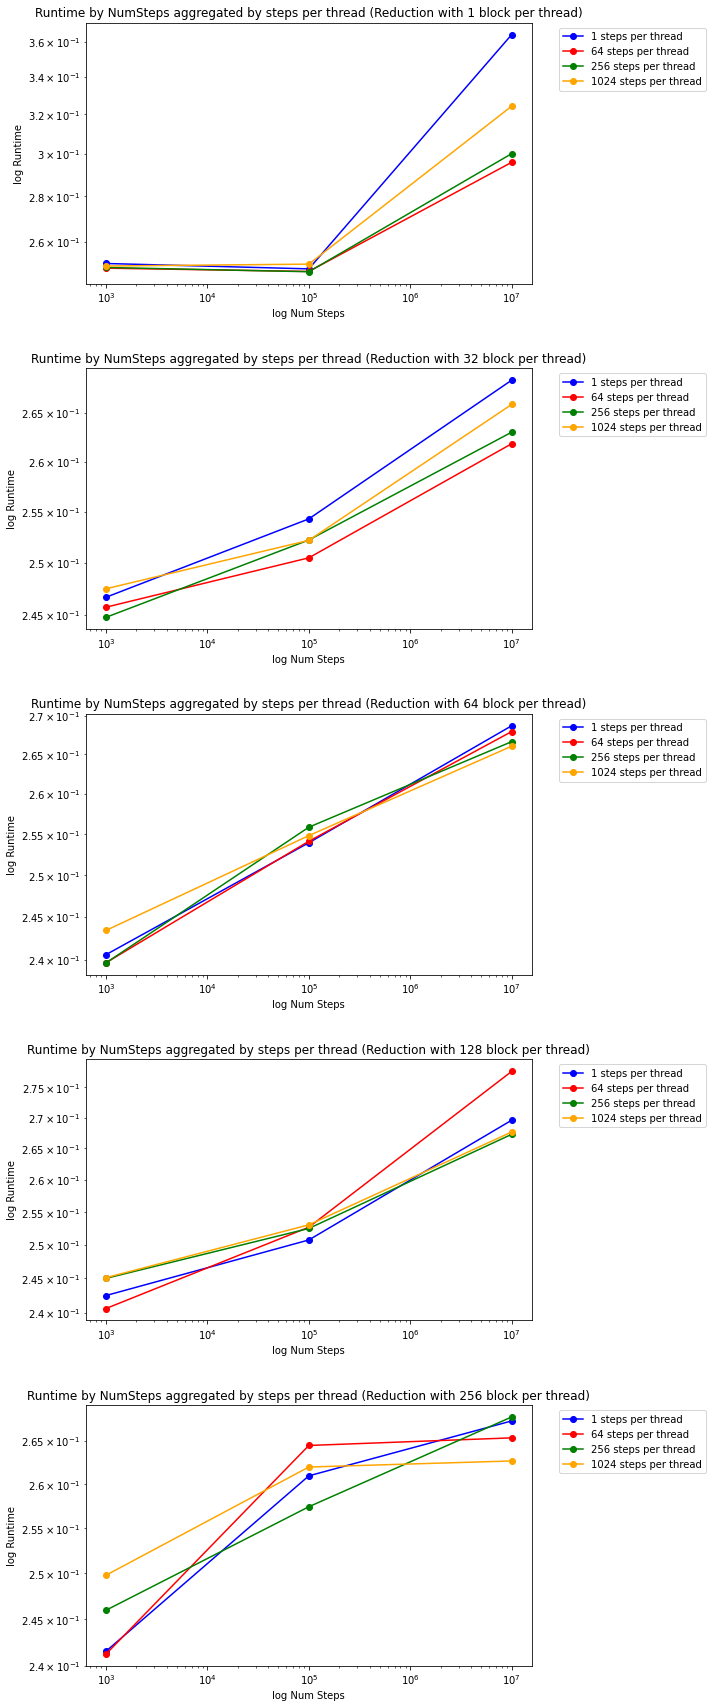

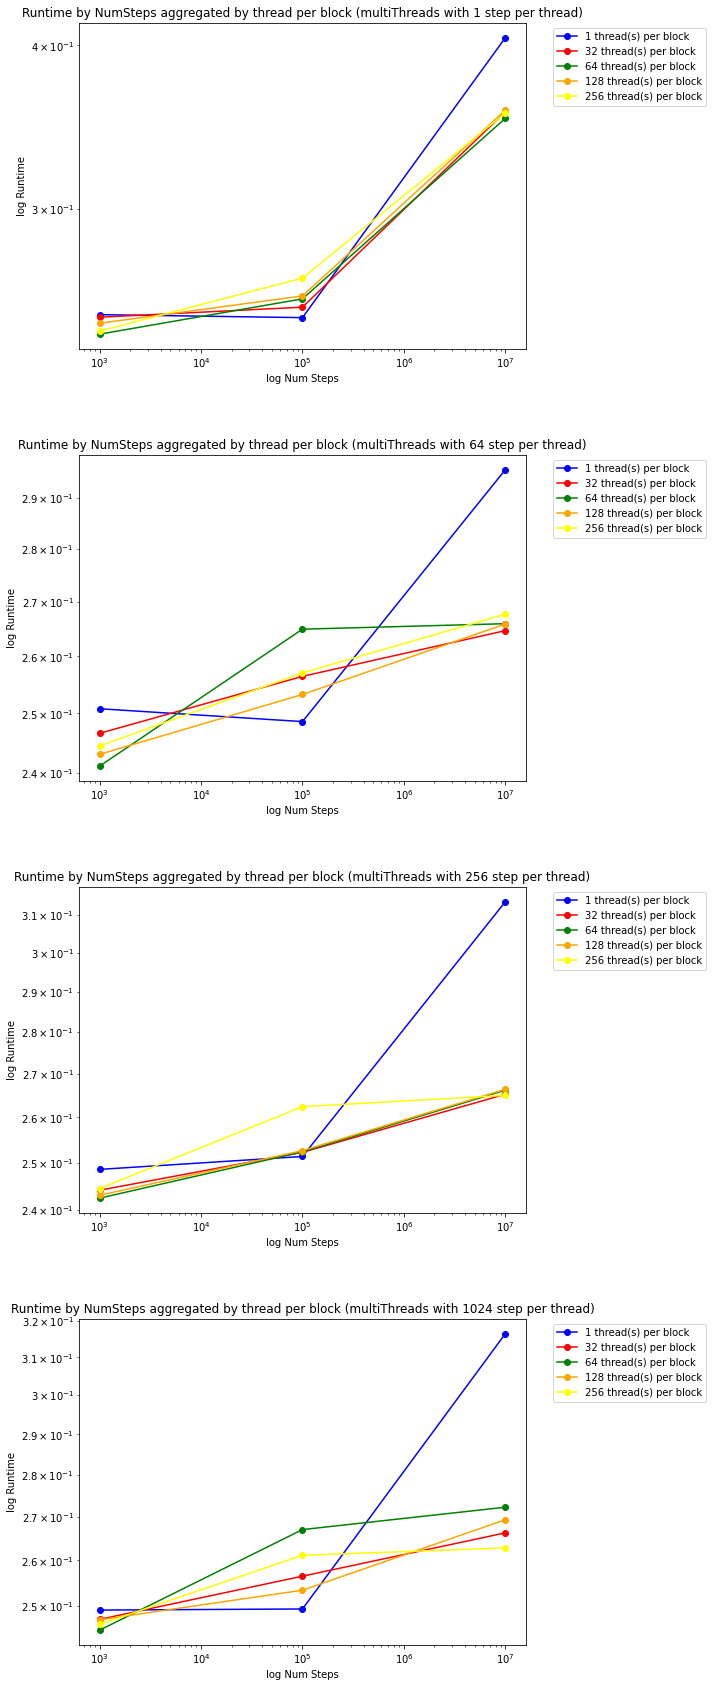

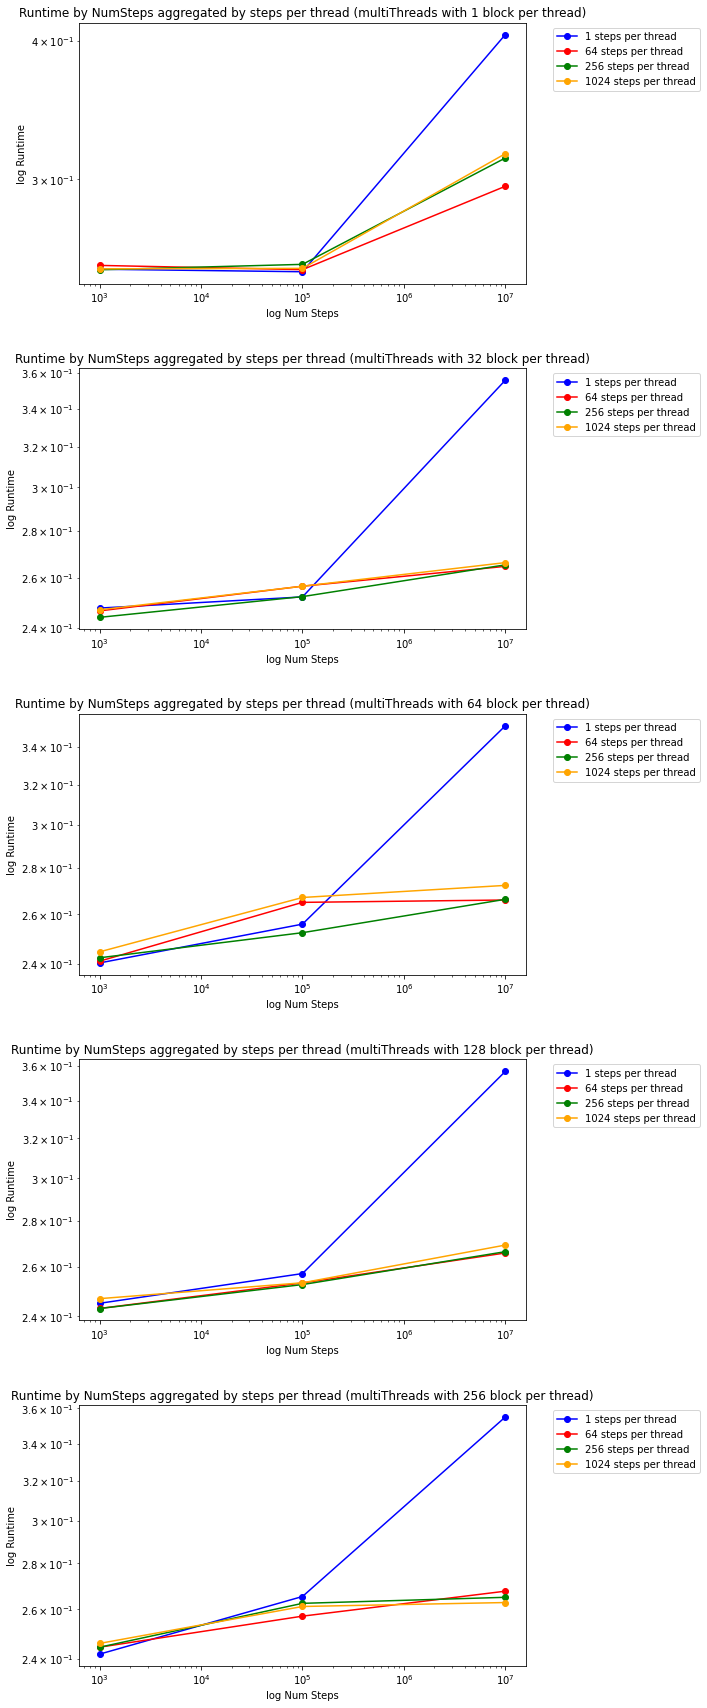

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(
    './saved_metrics/part1.csv',
    skiprows=1,
    names=['version','thread_per_block','step_per_thread','num_steps','runtime'],
    dtype={
        'version': str,
        'thread_per_block': int,
        'step_per_thread': int,
        'num_steps': int,
        'runtime': float
    })

step_per_threadColor = {1: "blue", 64: "red", 256: "green", 1024:"orange"}
thread_per_blockColor = {1: 'blue', 32: 'red', 64: 'green', 128: 'orange', 256:'yellow'}

df_avg_glbl = df.groupby(['version', 'num_steps', 'thread_per_block', 'step_per_thread'], as_index=False)['runtime'].mean()



for version in df_avg_glbl['version'].unique():
    fig = plt.figure(figsize=(8, 24))
    gs = fig.add_gridspec(4, 1)
    x = 0

    for sThread in df_avg_glbl['step_per_thread'].unique():
        ax = fig.add_subfigure(gs[x, 0]).add_subplot()
        x+=1

        for tBlock in df_avg_glbl['thread_per_block'].unique():
            df_plot = df_avg_glbl[
                (df_avg_glbl['step_per_thread'] == sThread)
                & (df_avg_glbl['version'] == version)
                & (df_avg_glbl['thread_per_block'] == tBlock)]
            
            ax.plot(
                df_plot['num_steps'].to_numpy(),
                df_plot['runtime'].to_numpy(),
                linestyle='solid', color=thread_per_blockColor[tBlock],
                marker='o', label=f'{tBlock} thread(s) per block'
            )
        ax.set_title(f'Runtime by NumSteps aggregated by thread per block ({version} with {sThread} step per thread)')
        ax.set_xlabel('log Num Steps')
        ax.set_xscale('log')
        ax.set_ylabel('log Runtime')
        ax.set_yscale('log')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


    fig = plt.figure(figsize=(8, 24))
    gs = fig.add_gridspec(5, 1)
    x = 0

    for tBlock in df_avg_glbl['thread_per_block'].unique():
        ax = fig.add_subfigure(gs[x, 0]).add_subplot()
        x+=1

        for sThread in df_avg_glbl['step_per_thread'].unique():
            df_plot = df_avg_glbl[
                (df_avg_glbl['step_per_thread'] == sThread)
                & (df_avg_glbl['version'] == version)
                & (df_avg_glbl['thread_per_block'] == tBlock)]
            
            ax.plot(
                df_plot['num_steps'].to_numpy(),
                df_plot['runtime'].to_numpy(),
                linestyle='solid', color=step_per_threadColor[sThread],
                marker='o', label=f'{sThread} steps per thread'
            )
        ax.set_title(f'Runtime by NumSteps aggregated by steps per thread ({version} with {tBlock} block per thread)')
        ax.set_xlabel('log Num Steps')
        ax.set_xscale('log')
        ax.set_ylabel('log Runtime')
        ax.set_yscale('log')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    



    
plt.tight_layout()
plt.show()


## Part  : Matrix-Vector Operation
### Compilation

In [26]:
import os
os.makedirs('dist/part2', exist_ok=True)

!nvcc -o dist/part2/part_2_vector_multiThread src/part2/part_2_vector_multiThread.cu
!nvcc -o dist/part2/part_2_vector_sharedMem src/part2/part_2_vector_sharedMem.cu

src/part2/part_2_vector_multiThread.cu(53): warning #177-D: variable "nrepeat" was declared but never referenced



### Performance evaluation

In [ ]:
import os
import subprocess
import csv
import time

try:
    os.remove("saved_metrics/part2.csv")
except OSError:
    pass
os.makedirs('saved_metrics',exist_ok=True)

thread_per_block = [1, 32, 64, 128, 256]
N = [2, 4, 8, 10, 12, 14]
M = [1, 3, 7, 9, 11, 13]
repeats = range(0,10)
dist_dir = "dist/part2"
csv_fields = ["version", "thread_per_block", "N", "M", "runtime"]

with open('./saved_metrics/part2.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(csv_fields)



    for tBlock in thread_per_block:
        for repeat in repeats:
            for n in N:
                for m in M:
                    for file in os.listdir(dist_dir):
                        if file.startswith('.'):
                            continue
                        filename = os.path.join(os.getcwd(), dist_dir ,os.fsdecode(file))
                        args = (filename, "-N", str(n), "-M", str(m), "-T", str(tBlock))
                        start = time.time()
                        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
                        popen.wait()
                        end = time.time()
                        version = os.fsdecode(file).split('_')[-1]
                        writer.writerow([version, tBlock, n, m, end-start])

csvFile.close()

### Performance analysis
#### Weak scaling

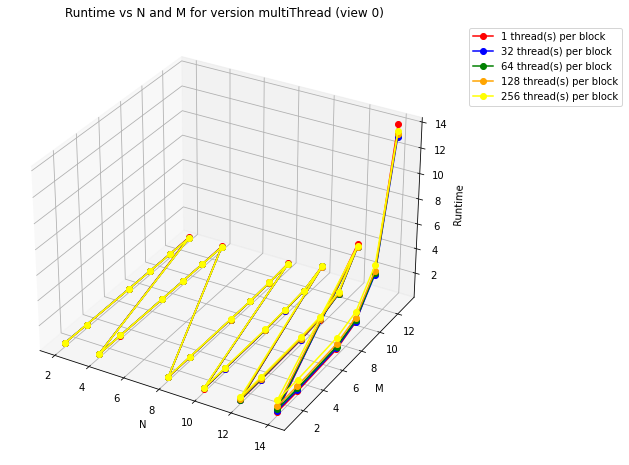

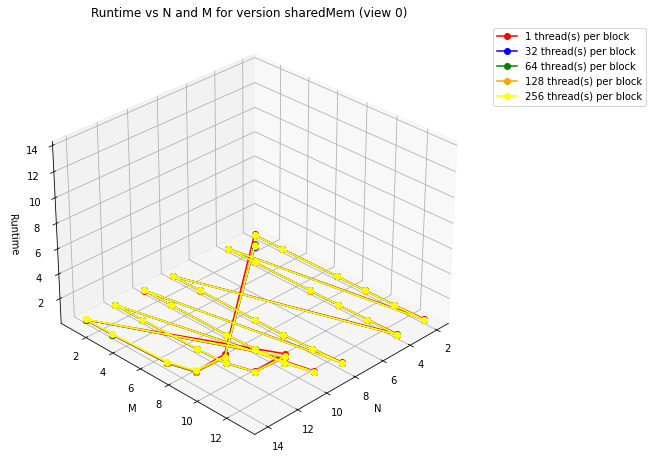

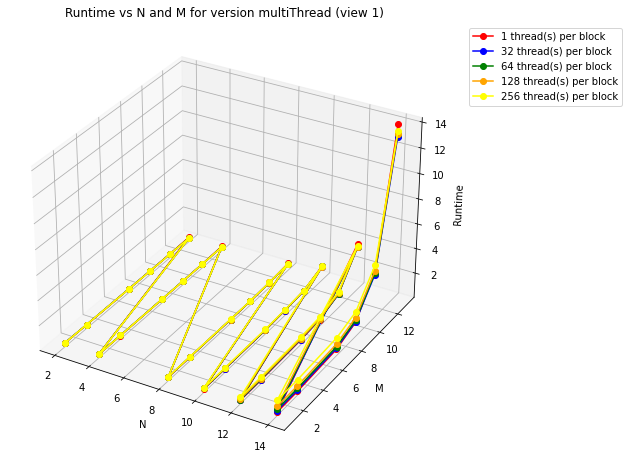

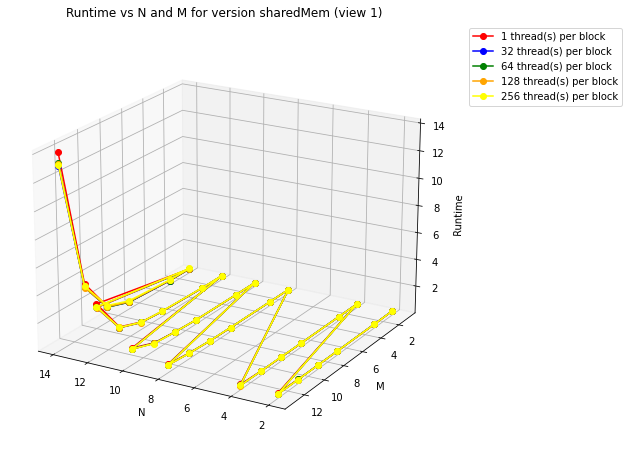

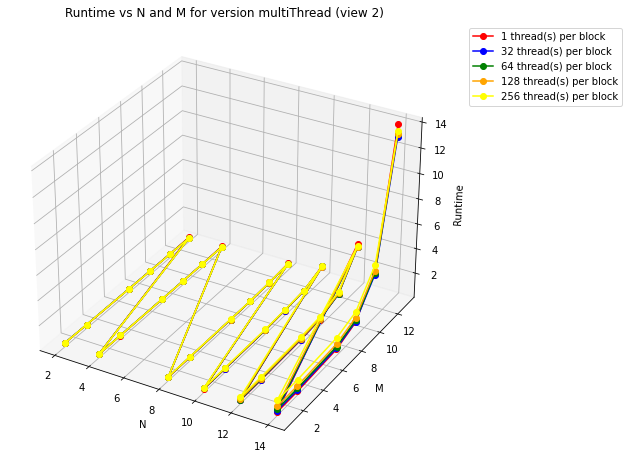

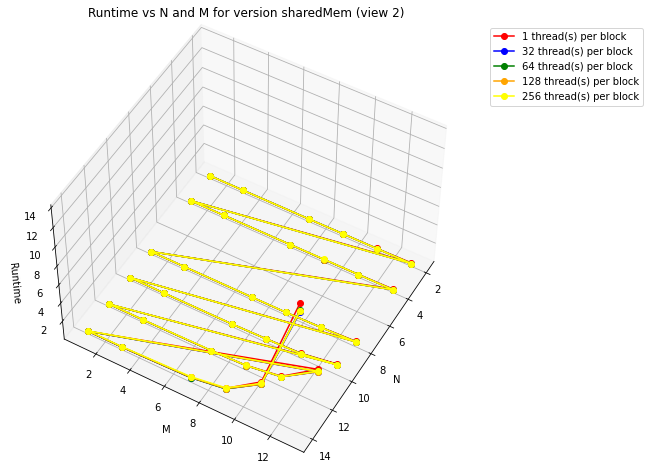

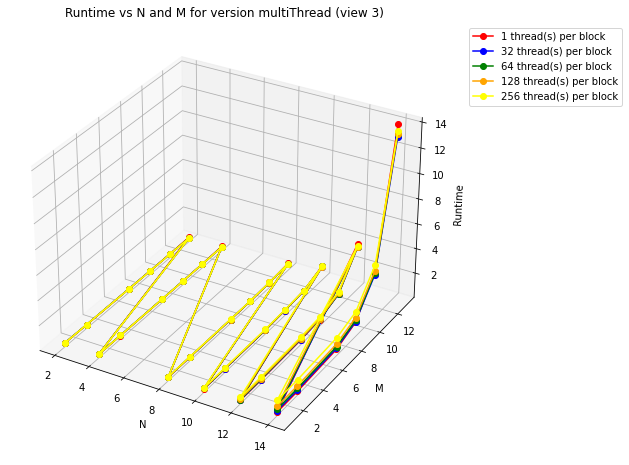

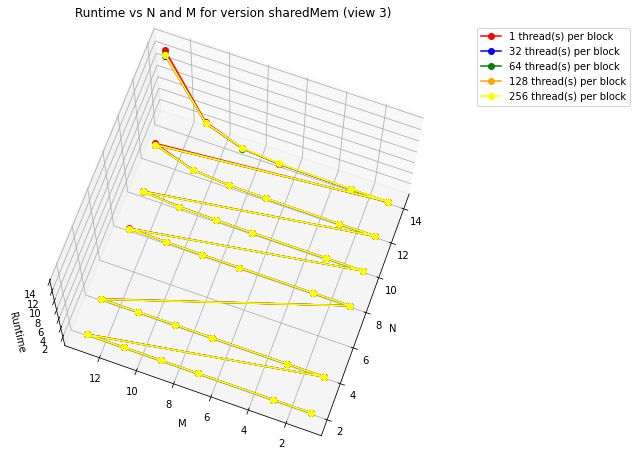

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(
    './saved_metrics/part2.csv', 
    skiprows=1, 
    names=['version', 'thread_per_block', 'N', 'M', 'runtime'], 
    dtype={
        'version': str,
        'thread_per_block': int,
        'N': int,
        'M' : int,
        'runtime': float
    }
)

threadBlockColor = {1: "red", 32: "blue", 64: "green", 128:"orange", 256: 'yellow'}
versionColor = {"multiThread": "red", "sharedMem": "blue"}
df_avg_glbl = df.groupby(['version', 'thread_per_block', 'N', 'M'], as_index=False)['runtime'].mean()

angles = [(30, 45), (20, 120), (50, 30), (70, 200)]

for i, (elev, azim) in enumerate(angles):
    for version in df_avg_glbl['version'].unique():
        fig = plt.figure(figsize=(10,8))
        ax = fig.add_subplot(111, projection='3d')
        for tBlock in df_avg_glbl['thread_per_block'].unique():
            df_plot = df_avg_glbl[
                (df_avg_glbl['thread_per_block'] == tBlock) & 
                (df_avg_glbl['version'] == version)
            ]
            ax.plot(
                df_plot['N'].to_numpy(),
                df_plot['M'].to_numpy(),
                df_plot['runtime'].to_numpy(),
                linestyle='solid',
                color=threadBlockColor[tBlock],
                marker='o',
                label=f'{tBlock} thread(s) per block'
            )

        ax.set_xlabel('N')
        ax.set_ylabel('M')
        ax.set_zlabel('Runtime')
        ax.set_title(f'Runtime vs N and M for version {version} (view {i})')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    ax.view_init(elev=elev, azim=azim)    


plt.show()
